In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore

In [2]:
df = pd.read_csv('house_price.csv')

In [3]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
# Q1: Perform basic EDA

print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [5]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [6]:
print("\nChecking Missing Values:")
print(df.isnull().sum())


Checking Missing Values:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [7]:
# Q2: Detect and handle outliers

data = pd.DataFrame({'price_per_sqft': [100, 150, 200, 250, 300, 1000, 1500]})

print("Original Data:")
print(data)



Original Data:
   price_per_sqft
0             100
1             150
2             200
3             250
4             300
5            1000
6            1500


In [8]:
def remove_outliers_using_sd(data, col):
    mean, std = data[col].mean(), data[col].std()
    lower, upper = mean - 3 * std, mean + 3 * std
    return data[(data[col] >= lower) & (data[col] <= upper)]

cleaned_data = remove_outliers_using_sd(data, 'price_per_sqft')

print("\nData After Removing Outliers Using Standard Deviation:")
print(cleaned_data)


Data After Removing Outliers Using Standard Deviation:
   price_per_sqft
0             100
1             150
2             200
3             250
4             300
5            1000
6            1500


In [9]:
def remove_outliers_using_percentile(data, col):
    lower, upper = data[col].quantile(0.01), data[col].quantile(0.99)
    filtered_data = data[(data[col] >= lower) & (data[col] <= upper)]
    print(f"Data after removing outliers using Percentile method:\n{filtered_data}")
    return filtered_data

In [10]:
filtered_data = remove_outliers_using_percentile(df, 'price_per_sqft')


Data after removing outliers using Percentile method:
                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft

In [11]:
# Print the filtered dataset

print("Filtered Data (After Percentile Method):")
print(filtered_data)

Filtered Data (After Percentile Method):
                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0         

In [12]:
# Print a summary of the filtered dataset

print("\nSummary of Filtered Data (After Percentile Method):")
print(filtered_data.describe())


Summary of Filtered Data (After Percentile Method):
         total_sqft          bath         price           bhk  price_per_sqft
count  12941.000000  12941.000000  12941.000000  12941.000000    12941.000000
mean    1529.261860      2.672359    106.685238      2.781392     6494.895139
std      941.591068      1.264080    119.651740      1.210163     3502.061133
min      250.000000      1.000000      8.000000      1.000000     2549.000000
25%     1100.000000      2.000000     50.000000      2.000000     4285.000000
50%     1275.000000      2.000000     71.130000      3.000000     5434.000000
75%     1664.000000      3.000000    120.000000      3.000000     7252.000000
max    30400.000000     27.000000   2340.000000     27.000000    23674.000000


In [13]:
def remove_outliers_using_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Print intermediate values
    print(f"Column: {col}")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR (Q3 - Q1): {IQR}")
    print(f"Lower Bound: {lower}")
    print(f"Upper Bound: {upper}")


filtered_df = remove_outliers_using_iqr(df, 'price_per_sqft')



Column: price_per_sqft
Q1 (25th percentile): 4267.0
Q3 (75th percentile): 7317.0
IQR (Q3 - Q1): 3050.0
Lower Bound: -308.0
Upper Bound: 11892.0


In [14]:
data = pd.DataFrame({'price_per_sqft': [1000, 1500, 2000, 2500, 3000, 10000, 12000, 14000]})


def remove_outliers_using_zscore(data, col):
    z_scores = zscore(data[col])
    return data[np.abs(z_scores) < 3]


filtered_data = remove_outliers_using_zscore(data, 'price_per_sqft')



In [15]:
# Printing the result
print("Data after removing outliers using Z-Score method:")
print(filtered_data)

Data after removing outliers using Z-Score method:
   price_per_sqft
0            1000
1            1500
2            2000
3            2500
4            3000
5           10000
6           12000
7           14000


In [16]:
# Detect and remove outliers for 'price per sqft'


df['price_per_sqft'] = df['price_per_sqft'] / df['total_sqft']

methods = {'SD': remove_outliers_using_sd,
    'Percentile': remove_outliers_using_percentile,
    'IQR': remove_outliers_using_iqr,
    'Z-Score': remove_outliers_using_zscore}

outlier_removed_data = {}
for method, func in methods.items():
    
    # Apply the function
    filtered_data = func(df.copy(), 'price_per_sqft')

 

Data after removing outliers using Percentile method:
                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft

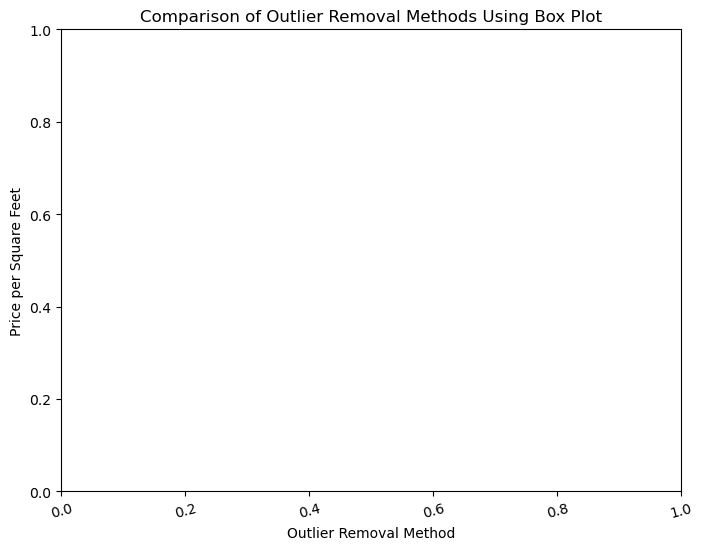

In [17]:
# Q3: Box Plot for each method

boxplot_data = pd.DataFrame({method: data['price_per_sqft'] for method, data in outlier_removed_data.items()})

plt.figure(figsize=(8, 6))
sns.boxplot(data=boxplot_data, orient="v", palette="Set2")
plt.title("Comparison of Outlier Removal Methods Using Box Plot")
plt.xlabel("Outlier Removal Method")
plt.ylabel("Price per Square Feet")
plt.xticks(rotation=15)
plt.show()

Original Data:
Skewness of price_per_sqft: 114.6264
Kurtosis of price_per_sqft: 13155.4826


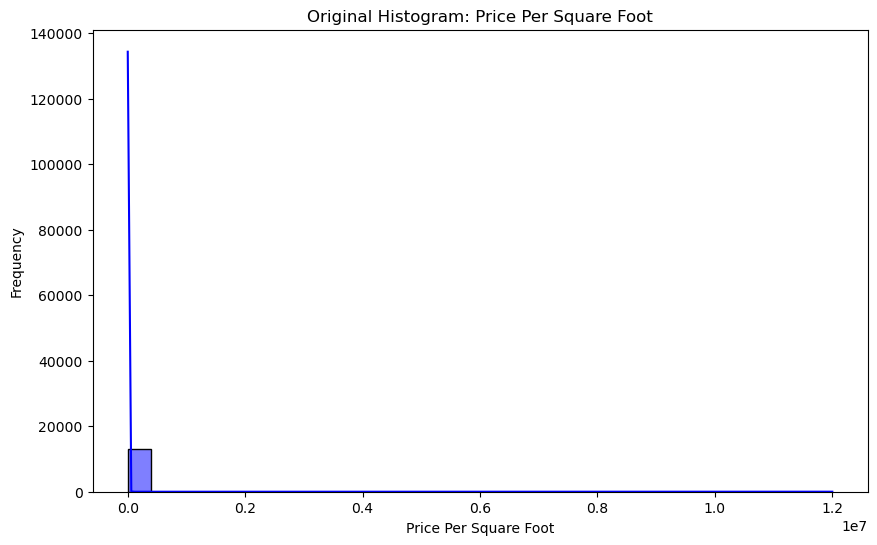

In [42]:
# Q4: Histogram and Normality check

def print_skewness_kurtosis(data, col):
    skewness = skew(data[col].dropna())
    kurt = kurtosis(data[col].dropna())
    print(f"Skewness of {col}: {skewness:.4f}")
    print(f"Kurtosis of {col}: {kurt:.4f}")

print("Original Data:")
print_skewness_kurtosis(df, 'price_per_sqft')

plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=30, color='blue')
plt.title('Original Histogram: Price Per Square Foot')
plt.xlabel('Price Per Square Foot')
plt.ylabel('Frequency')
plt.show()


After Log Transformation:
Skewness of price_per_sqft_log: 4.8355
Kurtosis of price_per_sqft_log: 91.5983


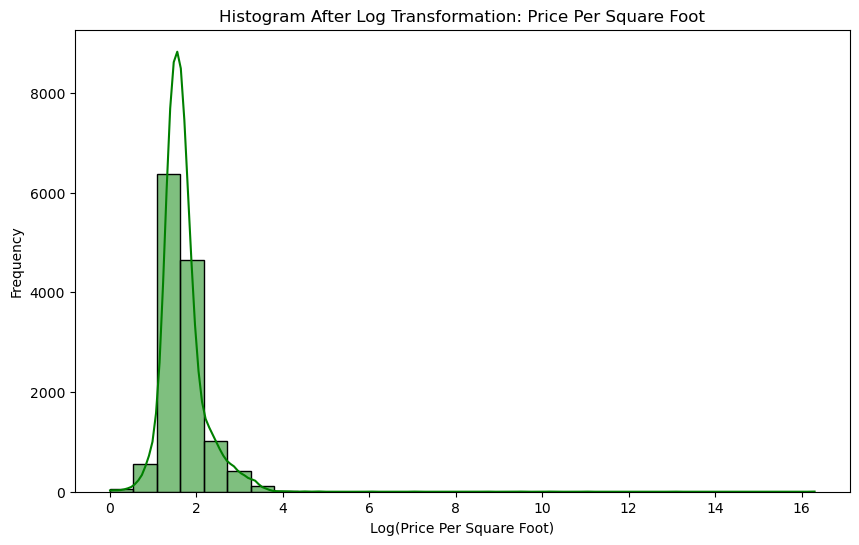

In [46]:
# Perform log transformation to reduce skewness


df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])


# Check skewness and kurtosis after transformation
print("\nAfter Log Transformation:")
print_skewness_kurtosis(df, 'price_per_sqft_log')

plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft_log'], kde=True, bins=30, color='green')
plt.title('Histogram After Log Transformation: Price Per Square Foot')
plt.xlabel('Log(Price Per Square Foot)')
plt.ylabel('Frequency')
plt.show()



After Square Root Transformation:
Skewness of price_per_sqft_sqrt: 108.0073
Kurtosis of price_per_sqft_sqrt: 12043.5400


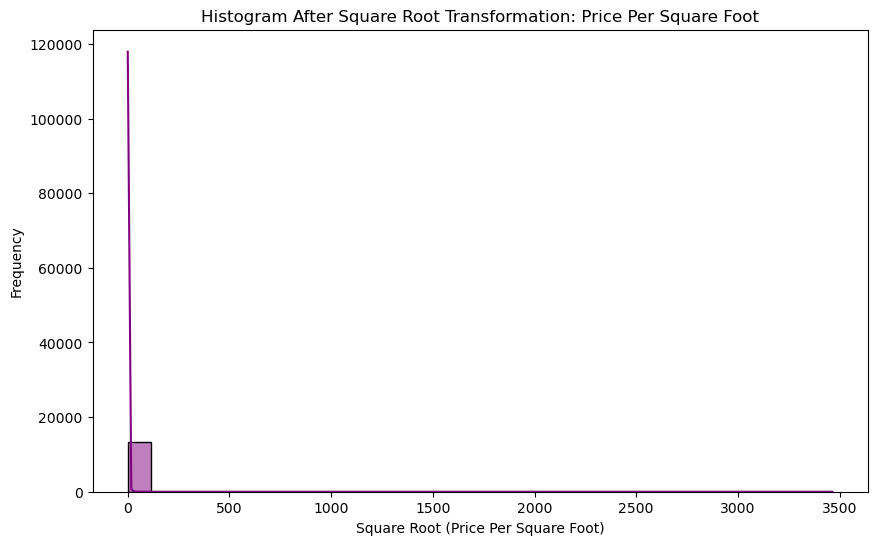

In [48]:
# If needed, apply another transformation (e.g., square root)

df['price_per_sqft_sqrt'] = np.sqrt(df['price_per_sqft'])

print("\nAfter Square Root Transformation:")
print_skewness_kurtosis(df, 'price_per_sqft_sqrt')

plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft_sqrt'], kde=True, bins=30, color='purple')
plt.title('Histogram After Square Root Transformation: Price Per Square Foot')
plt.xlabel('Square Root (Price Per Square Foot)')
plt.ylabel('Frequency')
plt.show()

In [50]:
# Q5: Correlation Heatmap

# Inspect the dataset to identify numerical columns
print("Dataset Info:")
print(df.info())
print("\nNumerical Columns Summary:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             13200 non-null  object 
 1   size                 13200 non-null  object 
 2   total_sqft           13200 non-null  float64
 3   bath                 13200 non-null  float64
 4   price                13200 non-null  float64
 5   bhk                  13200 non-null  int64  
 6   price_per_sqft       13200 non-null  float64
 7   price_per_sqft_log   13200 non-null  float64
 8   price_per_sqft_sqrt  13200 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 928.3+ KB
None

Numerical Columns Summary:
         total_sqft          bath         price           bhk  price_per_sqft  \
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04   
mean    1555.302783      2.691136    112.276178      2.800833    9.57

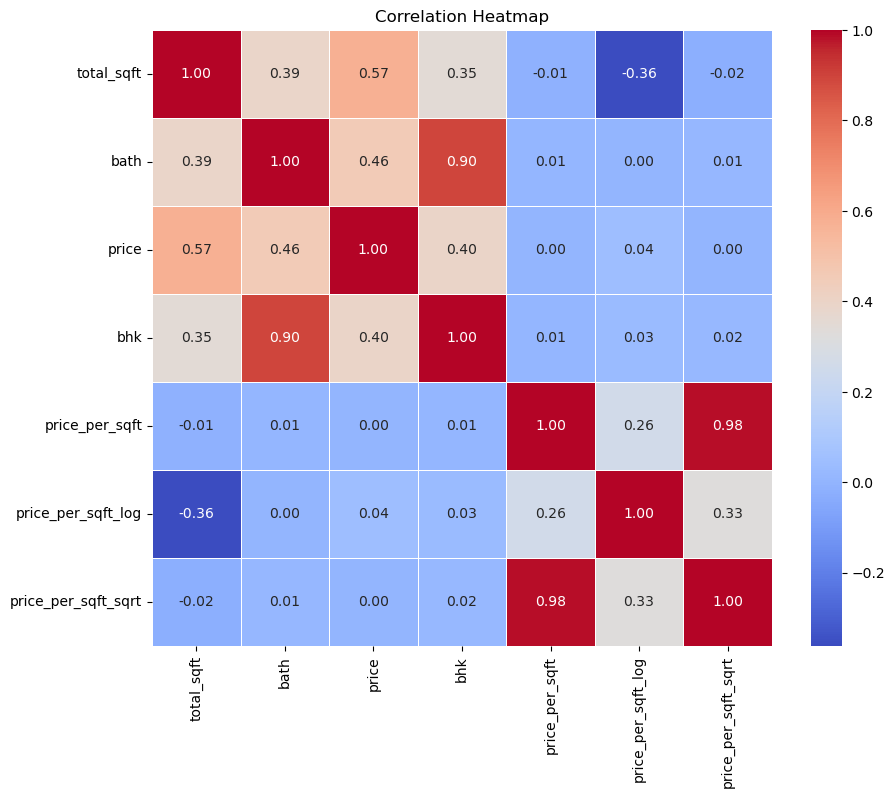

In [60]:
# Filter only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Plot heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

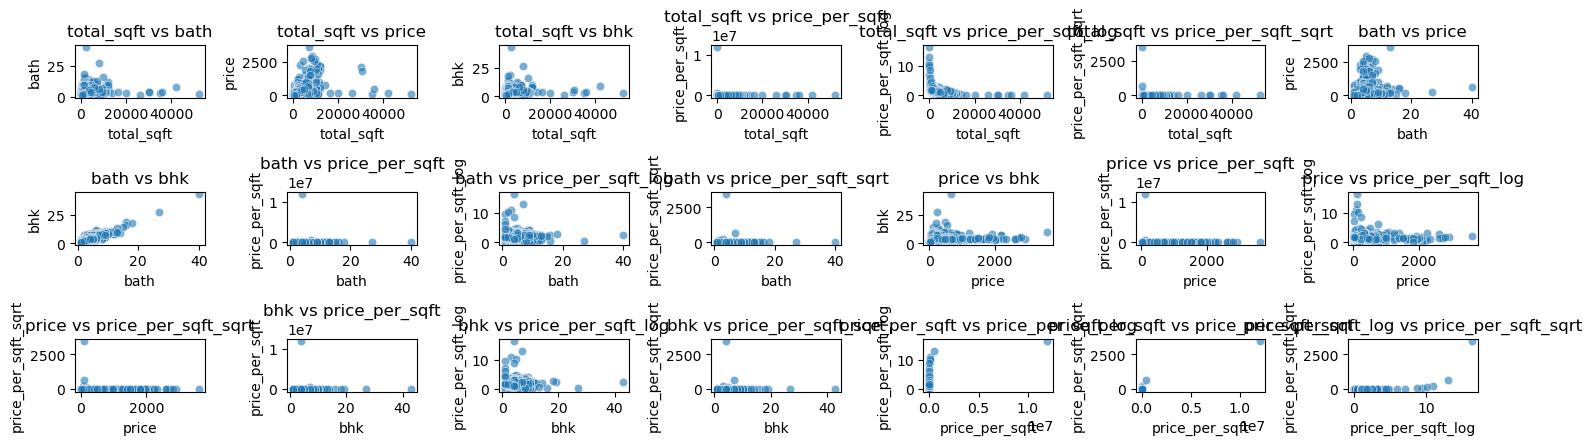

In [70]:
# Q6: Scatter Plot between variables

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


# Create scatter plots for all pairs of numerical columns

plt.figure(figsize=(15, 10))
plot_number = 1
for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i < j:  
            plt.subplot(len(numerical_columns), len(numerical_columns), plot_number)
            sns.scatterplot(data=df, x=col1, y=col2, alpha=0.6)
            plt.title(f'{col1} vs {col2}')
            plot_number += 1

plt.tight_layout()
plt.show()